In [2]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from numpy import pi

In [4]:
def qft_rotate_single(qc, i):
    qc.h(i)
    for j in reversed(range(0, i)):
        qc.cp(pi/2**(i-j), j, i)

def qft(qc, n):
    for i in reversed(range(n)):
        qft_rotate_single(qc, i)
    for i in range(n//2):
        qc.swap(i, n-(i+1))

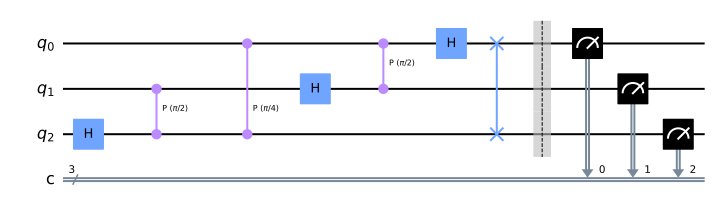

In [6]:
"""量子フーリエ変換回路を作成する
"""
n = 3  # 使用する量子ビット
qc = QuantumCircuit(n, n)

qft(qc, n)
qc.barrier()

for i in range(n):
    qc.measure(i, i)

qc.draw("mpl")

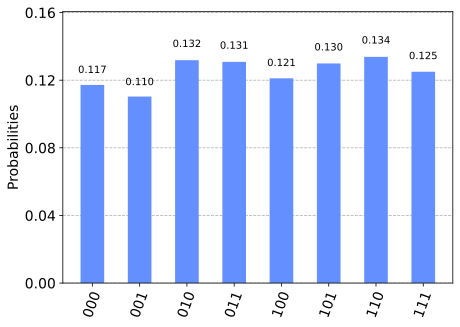

In [8]:
"""実行
初期状態|0>をそのままフーリエ変換すると、測定結果はすべて等確率になる。
"""
backend = Aer.get_backend("aer_simulator")
shots = 1024
results = execute(qc, backend=backend, shots=shots).result()
counts = results.get_counts()
plot_histogram(counts)

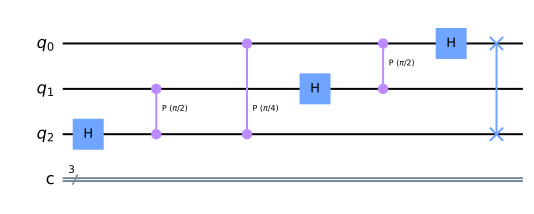

In [11]:
"""Statevector Simulatorで実行するために量子回路を作る
今回は測定前の状態ベクトルを確認するため、量子回路に測定は含めない
"""
n = 3
qc2 = QuantumCircuit(n, n)

qft(qc2, n)

qc2.draw()

In [14]:
"""Statevector Simulatorで実行
すべて同じ値
"""
statevector_backend = Aer.get_backend("statevector_simulator")
results = execute(qc2, backend=statevector_backend).result()
statevector = results.get_statevector(qc2)
print(statevector)

[0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]
